In [3]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Esercizio: BMW-i8

**Una BMW i8 accelera a tavoletta su un rettilineo**

<center>
<img src="assets/bmw-i8.png" width=30%/>
</center>

Supponiamo che il motore eroghi una forza costante $F$

* L'auto ha un motore elettrico, così l'assunzione non è così irrealistica

Alla direzione del moto si oppone la forza di trascinamento:

$$
F_t = -\frac{1}{2} \rho C_D A v |v|
$$

* $\rho$ è la densità dell'aria, $v$ è la velocità
* $A$ è la superficie della sezione dell'auto
* $C_D$ è un coefficiente di trascinamento

**Quindi il sistema è definito dall'ODE:**

$$
\ddot{x} = \frac{1}{m} (F + F_t)
$$

Che può essere riscritta come:

$$
\left(\begin{array}{c}
\dot{x} \\
\dot{v}
\end{array}\right)
=
\left(\begin{array}{c}
v \\
\frac{1}{m} (F + F_t)
\end{array}\right)
$$

* Dove $m$ è la massa dell'auto

## Esercizio 1

**Nel modulo `sol.bmw` definire la classe**

```python
class Dstate:
    def __init__(self, Cd, rho=1.25, A=2.5*1.2, m=1539, F=10000):
        ...

    def __call__(self, X, t):

        ...

```

* Il metodo `__call__` deve calcolare la funzione che definisce l'ODE
* Diversi parametri (come indicato) hanno un valore di default
* Il metodo deve restituire un array `numpy` con le due componenti della derivata


**Nel modulo `sol.bmw` si definisca quindi la funzione:**

```python
def simulate(Cd, x0=[0, 0], t=np.linspace(0, 60, 60000)):
    ...
```

* La funzione deve risolvere un problema ai valori iniziali
* ...Con lo stato iniziale ed il vettorei dei tempi indicati
* Il metodo deve restituire
  - La matrice con gli stati visitati
  - Il vettore dei tempi visitati

Si collaudi la funzione per $C_d = 0.82$. Per verificare la correttezza dei risultati, può essere utile disegnare l'andamento dello stato usando la funzione `plot_state_evolution` nel modulo `base.util` incluso nel tema d'esame.


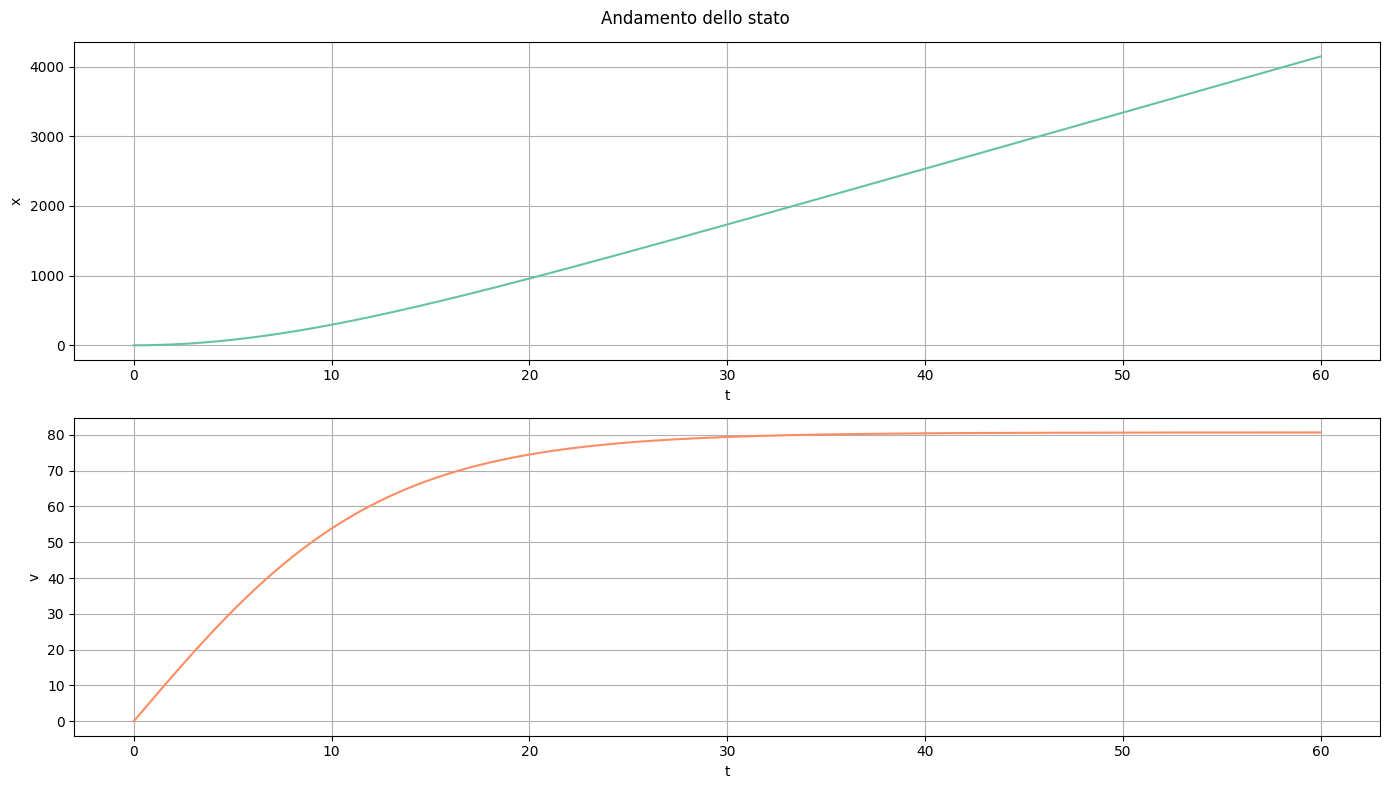

In [11]:
from sol import bmw
from base import util

X, t = bmw.simulate(Cd=0.82)
util.plot_state_evolution(X, t, xlabel='t', ylabels=['x', 'v'], figsize=(14, 8), title='Andamento dello stato')

## Esercizio 2

**La velocità terminale dell'auto può essere determinata individuando le condizioni per l'annullamento dell'accelerazione, i.e.:**

$$
\dot{v} = \frac{1}{m} (F + F_t) = 0
$$

Da cui si ottiene facilmente l'equazione non lineare:

$$
F(v) = F + F_t(v) = 0
$$

**Nel modulo `sol.bmw` si definisca la funzione:**

```python
def find_terminal_speed_aux(v, Cd=0.82, rho=1.25, A=2.5*1.2, m=1539, F=10000):
    ...
```

* La funzione deve calcolare e restituire il valore di $F(v)$, con i rimanenti parametri eventualmente specificati al momento della chiamata

**Nel modulo `sol.bmw` si definisca la funzione:**

```python
def find_terminal_speed(a=0, b=100):
    ...
```

* La funzione deve utilizzare il metodo `scipy.optimize.brentq` per determinare la velocità terminale
* La funzione deve restituire il valore della velocità terminale

In [12]:
v_term = bmw.find_terminal_speed()
print(f'Velocità terminale: {v_term}')

Velocità terminale: 80.64778385455118


## Esercizio 3

**Nel modulo `sol.bmw` si definisca la funzione**

```python
def speed_in_5_seconds(Cd):
    ...
```

* Che, dato un valore per $C_d$ calcoli la velocità raggiunta in 5 secondi
* La funzione deve restituire tale valore di velocità

**Sia $f(Cd)$ la funzione appena definita**

È possibile determinare per quale valore di $C_d$ la velocità raggiunta in $5$ secondi sia pari ad un valore desiderato $v^*$, risolvendo l'equazione non lineare:

$$
F_2(C_d) = f(C_d) - v^* = 0
$$

**Nel modulo `sol.bmw` si definisca la funzione:**

```python
def find_Cd_aux(Cd):
    ...
```

* La funzione deve calcolare e restituire il valore di $F_2(C_d)$ per $v^* = 31 m/s$

**Nel modulo `sol.bmw` si definisca la funzione**

```python
def find_Cd(a=0.2, b=1.0):
    ...
```

* La funzione deve utilizzare il metodo `scipy.optimize.brentq` per determinare il valore di $C_d$ che permette all'automobile di raggiungere in $5$ secondi la velocità di $v^* = 31 m/s$
* La funzione deve restituire il valore di $C_d$ così calcolato

In [9]:
Cd_sol = bmw.find_Cd()
print(f'Valore di C_d: {Cd_sol}')
v5_sol = bmw.speed_in_5_seconds(Cd_sol)
print(f'Velocità in 5 secondi: {v5_sol}')

Valore di C_d: 0.7349464723132864
Velocità in 5 secondi: 30.999999999999964
